In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive
%cd Project/COVID-19-master
!ls

In [ ]:
# # #importing 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [ ]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

DATASET PREPARATION AND PREPROCESSING

In [ ]:
# INPUT_SIZE = (128, 128)
# mapping = {'normal': 0, 'pneumonia': 1,  'COVID-19': 2}
# train_filepath = 'train_COVIDx5.txt'
# test_filepath = 'test_COVIDx5.txt'

In [ ]:
# # # load in the train and test files
# file = open(train_filepath, 'r')
# trainfiles = file.readlines()
# # file = open(test_filepath, 'r')
# # testfiles = file.readlines()

In [ ]:
# print('Total samples for train: ', len(trainfiles))
# print('Total samples for test: ', len(testfiles))

In [ ]:
# resize to input size and normalize to 0 - 1
# x_test = []
# y_test = []

# for i in range(len(testfiles)):
#     test_i = testfiles[i].split()
#     imgpath = test_i[1]
#     img = cv2.imread(os.path.join('data', 'test', imgpath))
#     img = cv2.resize(img, INPUT_SIZE) # resize
#     img = img.astype('float32') / 255.0
#     x_test.append(img)
#     y_test.append(mapping[test_i[2]])

# print('Shape of test images: ', x_test[0].shape)


# x_test = []
# y_test = []

# for i in range(len(testfiles)):
#     test_i = testfiles[i].split()
#     imgpath = test_i[1]
#     img = cv2.imread(os.path.join('data', 'test', imgpath))
#     img = cv2.resize(img, INPUT_SIZE) # resize
#     img = img.astype('float32') / 255.0
#     x_test.append(img)
#     y_test.append(mapping[test_i[2]])

# print('Shape of test images: ', len(x_test))

In [ ]:
# print(np.shape(x_test),y_test)

In [ ]:
# export to npy to load in for training

# np.save('data/x_test.npy', x_test)
# np.save('data/y_test.npy', y_test)

In [ ]:
# import cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# from tqdm import tqdm
# x_train = []
# INPUT_SIZE = (128, 128)
# train_filepath = 'train_COVIDx5.txt'
# file = open(train_filepath, 'r')
# trainfiles = file.readlines()
# for i in tqdm(range(len(trainfiles))):
#   train_i = trainfiles[i].split()
#   imgpath = train_i[1]
#   img = cv2.imread(os.path.join('data', 'train', imgpath))
#   #print(imgpath)
#   img = cv2.resize(img, INPUT_SIZE) # resize
#   img = img.astype('float32') / 255.0
#   x_train.append(img)
# np.save('data/x_train_128.npy', x_train)
 
 
# x_train = []
# INPUT_SIZE = (229, 229)
# train_filepath = 'train_COVIDx5.txt'
# file = open(train_filepath, 'r')
# trainfiles = file.readlines()
# for i in tqdm(range(len(trainfiles))):
#   train_i = trainfiles[i].split()
#   imgpath = train_i[1]
#   img = cv2.imread(os.path.join('data', 'train', imgpath))
#   #print(imgpath)
#   img = cv2.resize(img, INPUT_SIZE) # resize
#   img = img.astype('float32') / 255.0
#   x_train.append(img)
# np.save('data/x_train_229.npy', x_train)
# # print('Shape of train images: ', x_train[0].shape)

In [ ]:
# np.save('data/x_train_128.npy', x_train)
# # np.save('data/y_train.npy', y_train)

In [ ]:
# !python Mykeras_model.py

In [ ]:
# !python Naddemmain.py

In [ ]:
# xtrain = np.load('data/x_train.npy')
# ytrain = np.load('data/y_train.npy')

# print("RUN HOGAYA") 
    
# xtest = np.load('data/x_test.npy')
# ytest = np.load('data/y_test.npy')

Load npy files of each sizes

In [ ]:
from os import listdir
from os.path import isfile, join
xtrain_224 = np.load('data/x_train.npy')
print("RUN HOGAYA")
ytrain = np.load('data/y_train.npy')
    
xtest = np.load('data/x_test.npy')
ytest = np.load('data/y_test.npy')

RUN HOGAYA


In [ ]:
xtrain_128=np.load('data/x_train_128.npy')
print("RUN HOGAYA")

RUN HOGAYA


In [ ]:
xtrain_229=np.load('data/x_train_229.npy')
ytrain = np.load('data/y_train.npy')
print("RUN HOGAYA")

Main code

In [ ]:
def confusion_matrix_info(y_true, y_pred, labels=['normal', 'pneumonia',  'COVID-19'],
                          title='confusion matrix'):
    import seaborn as sns
    import pandas as pd
    from sklearn.metrics import confusion_matrix, f1_score
    import matplotlib.pyplot as plt
    C2 = confusion_matrix(y_true, y_pred)
    C = pd.DataFrame(C2, columns=labels, index=labels)
    m, _ = C2.shape
    for i in range(m):
        precision = C2[i, i] / sum(C2[:, i])
        recall = C2[i, i] / sum(C2[i, :])
        f1 = 2 * precision * recall / (precision + recall)
        print('In class {}:\t total samples: {}\t true predict samples: {}\t'
              'acc={:.4f},\trecall={:.4f},\tf1-score={:.4f}'.format(
            labels[i], sum(C2[i, :]), C2[i, i], precision, recall, f1))
    print('-' * 100, '\n', 'average f1={:.4f}'.format(f1_score(y_true, y_pred, average='micro')))
 
    f, ax = plt.subplots()
    sns.heatmap(C, annot=True, ax=ax, cmap=plt.cm.binary)
    ax.set_title(title)
    ax.set_xlabel('predict')
    ax.set_ylabel('true')
    plt.savefig(title+'.jpg')

In [ ]:

resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
NUM_CLASSES = 3
DENSE_LAYER_ACTIVATION = 'softmax'



In [ ]:
#resnet_weights_path = 'resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'
NUM_CLASSES = 3
DENSE_LAYER_ACTIVATION = 'softmax'

def first_keras_model():
    model1 = Sequential()

    # 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
    # NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
    model1.add(ResNet50(include_top = False,input_shape=(128,128,3), pooling = 'avg', weights = resnet_weights_path))
    model1.add(BatchNormalization())

    # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
    model1.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

    # Say not to train first layer (ResNet) model as it is already trained
    
    return model1

def Second_keras_model():
    model2 = Sequential()

    # 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
    # NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
    model2.add(ResNet50(include_top = False,input_shape=(224,224,3), pooling = 'avg',weights = resnet_weights_path))
    model2.add(BatchNormalization())

    # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
    model2.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
    model2.load_weights("model1.h5")

    # Say not to train first layer (ResNet) model as it is already trained
    
    return model2

def Third_keras_model():
    model3 = Sequential()

    # 1st layer as the lumpsum weights from resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
    # NOTE that this layer will be set below as NOT TRAINABLE, i.e., use it as is
    model3.add(ResNet50(include_top = False,input_shape=(229,229,3), pooling = 'avg',weights = resnet_weights_path))
    model3.add(BatchNormalization())

    # 2nd layer as Dense for 2-class classification, i.e., dog or cat using SoftMax activation
    model3.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))
    model3.load_weights("model2.h5")

    # Say not to train first layer (ResNet) model as it is already trained
    
    return model3

In [ ]:
def train(xtrain128,xtrain224,xtrain229, y):
    y = tf.keras.utils.to_categorical(y, 3)
    y_test = tf.keras.utils.to_categorical(y_test, 3)


    #TRAINING ON 128*128 WITH FREEZED RESNET LAYER
    model = first_keras_model()
    model=model
    model.layers[0].trainable = False
    print(model.summary())
    opt=tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    hist = model.fit(xtrain128, y, batch_size=32,  epochs=3, verbose=1)


    #FINE TUNING ON 128*128 WITH UNFREEZED RESNET LAYER
    model.layers[0].trainable = True
    print(model.summary())
    opt=tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    hist = model.fit(xtrain128, y, batch_size=32,  epochs=5, verbose=1)
    model.save('model1.h5')


    #TRAINING ON 224*224 WITH FREEZED RESNET LAYER
    model2 = Second_keras_model()
    #print(model2.summary)
    model2.layers[0].trainable = False
    
    print(model2.summary())
    opt=tf.keras.optimizers.Adam(lr=0.0001)
    model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    hist = model2.fit(xtrain224, y, batch_size=32,  epochs=3, verbose=1)


    #FINE TUNING ON 224 WITH UNFREEZED RESNET LAYER
    model2=model2
    model2.layers[0].trainable = True
    print(model2.summary())
    opt=tf.keras.optimizers.Adam(lr=0.0001)
    model2.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    hist = model2.fit(xtrain224, y, batch_size=32,  epochs=5, verbose=1)
    model2.save('model2.h5')

    #TRAINING ON 229*229 WITH FREEZED RESNET LAYER
    model3 = Third_keras_model()
    model3=model3(training=False)
    model3.layers[0].trainable = False
    print(model3.summary())
    opt=tf.keras.optimizers.Adam(lr=0.00001)
    model3.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    hist = model3.fit(xtrain229, y, batch_size=32, epochs=25, verbose=1)
    model3.save('Final_model.h5')
    y_pred = model2.predict(xtrain224)
    confusion_matrix_info(np.argmax(y, axis=1), np.argmax(y_pred, axis=1),title='confusion_matrix_train')

In [ ]:
def test(xt, yt):
    model = tf.keras.models.load_model('model2.h5')
    xt = np.load('data/x_test.npy')
    yt = np.load('data/y_test.npy')
    y_pred = model.predict(xt)
    confusion_matrix_info(yt, np.argmax(y_pred, axis=1),title='confusion_matrix_test')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_7 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 6147      
Total params: 23,602,051
Trainable params: 10,243
Non-trainable params: 23,591,808
_________________________________________________________________
None
Epoch 1/3
437/437 [==============================] - 27s 62ms/step - loss: 0.7517 - accuracy: 0.6770
Epoch 2/3
437/437 [==============================] - 27s 61ms/step - loss: 0.6063 - accuracy: 0.7542
Epoch 3/3
437/437 [==============================] - 27s 61ms/step - loss: 0.5770 - accuracy: 0.7648
Model: "sequential_7"
_____________________________________

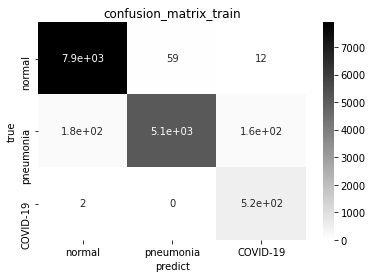

In [ ]:
train(xtrain_128,xtrain_224,xtrain_229, ytrain)

In [ ]:
test(xtest, ytest)